___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [53]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df1 = pd.read_csv("ansur_2_male.csv", encoding='latin-1')
df1.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [3]:
df1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       4082 non-null   int64 
 1    abdominalextensiondepthsitting  4082 non-null   int64 
 2    acromialheight                  4082 non-null   int64 
 3    acromionradialelength           4082 non-null   int64 
 4    anklecircumference              4082 non-null   int64 
 5    axillaheight                    4082 non-null   int64 
 6    balloffootcircumference         4082 non-null   int64 
 7    balloffootlength                4082 non-null   int64 
 8    biacromialbreadth               4082 non-null   int64 
 9    bicepscircumferenceflexed       4082 non-null   int64 
 10   bicristalbreadth                4082 non-null   int64 
 11   bideltoidbreadth                4082 non-null   int64 
 12   bimalleolarbreadth              

In [4]:
df1.DODRace.value_counts()

1    2817
2     642
3     440
4     117
6      34
5      29
8       3
Name: DODRace, dtype: int64

In [5]:
df2 = pd.read_csv("ansur_2_female.csv", encoding='latin-1')
df2.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [6]:
df2.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [7]:
data = pd.concat([df1,df2], axis=0, ignore_index=True)
df = data.copy()
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [8]:
df.shape

(6068, 108)

In [9]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [10]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [11]:
df.duplicated().value_counts(dropna=False)

False    6068
dtype: int64

In [12]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [13]:
# According to SubjectNumericRace in Data Content, Where 1 = White, 2 = Black, 3 = Hispanic and I did else 'Other' for dropping because their value counts below 500
df["DODRace"] = df.DODRace.apply(lambda x : 'White' if x == 1 else 'Black' if x == 2 else 'Hispanic' if x == 3 else 'Other')

In [14]:
df.DODRace.value_counts(dropna=False)

White       3792
Black       1298
Hispanic     679
Other        299
Name: DODRace, dtype: int64

In [15]:
DODRace_drop_index = df[df["DODRace"] == 'Other'].index
df.drop(index=DODRace_drop_index, inplace=True)

In [16]:
df.DODRace.value_counts(dropna=False)

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [17]:
df.SubjectNumericRace # We have DODRace column like same

0       1
1       1
2       2
3       1
4       2
       ..
6063    3
6064    3
6065    2
6066    3
6067    3
Name: SubjectNumericRace, Length: 5769, dtype: int64

In [18]:
df.drop("SubjectNumericRace", axis=1, inplace=True)

In [19]:
df.shape

(5769, 107)

In [20]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=107)

In [21]:
#which columns have null values
df.columns[df.isna().any()].tolist()

['Ethnicity']

In [22]:
df.Ethnicity.isnull().sum() # too much null values

4644

In [23]:
drop_col = df.columns[df.isna().any()].tolist()
df.drop(drop_col, axis=1, inplace=True)

In [24]:
df.isna().any().sum() # 0 nan values anymore

0

In [25]:
df.shape

(5769, 106)

In [26]:
# check object columns have how many unique values
for i in df.select_dtypes("object"):
    print(f"--> {i} <-- of total unique values : {df[i].nunique()}") 

--> Gender <-- of total unique values : 2
--> Date <-- of total unique values : 253
--> Installation <-- of total unique values : 12
--> Component <-- of total unique values : 3
--> Branch <-- of total unique values : 3
--> PrimaryMOS <-- of total unique values : 281
--> SubjectsBirthLocation <-- of total unique values : 136
--> DODRace <-- of total unique values : 3
--> WritingPreference <-- of total unique values : 3


In [27]:
# Date and PrimaryMOS are insignificant and they have too much unique values 
df.drop(columns=["Date","PrimaryMOS"], inplace=True)

In [28]:
df.select_dtypes("object")

,Gender,Installation,Component,Branch,SubjectsBirthLocation,DODRace,WritingPreference
0,Male,Fort Hood,Regular Army,Combat Arms,North Dakota,White,Right hand
1,Male,Fort Hood,Regular Army,Combat Support,New York,White,Left hand
2,Male,Fort Hood,Regular Army,Combat Support,New York,Black,Left hand
3,Male,Fort Hood,Regular Army,Combat Service Support,Wisconsin,White,Right hand
4,Male,Fort Hood,Regular Army,Combat Service Support,North Carolina,Black,Right hand
...,...,...,...,...,...,...,...
6063,Female,Camp Shelby,Army National Guard,Combat Support,Texas,Hispanic,Right hand
6064,Female,Camp Shelby,Army National Guard,Combat Support,Texas,Hispanic,Right hand
6065,Female,Camp Shelby,Army National Guard,Combat Support,Texas,Black,Right hand
6066,Female,Camp Shelby,Army National Guard,Combat Support,Texas,Hispanic,Right hand


In [29]:
df.Installation.value_counts() # this column insignificant too according to Data Content and there are 12 uniques

Camp Shelby       1111
Fort Bliss         925
Fort Gordon        636
Camp Atterbury     432
Fort McCoy         432
Fort Hood          416
Fort Huachuca      404
Fort Bragg         373
Fort Drum          369
Fort Lee           356
Fort Stewart       314
Fort Rucker          1
Name: Installation, dtype: int64

In [30]:
df.drop("Installation", axis=1, inplace=True)

In [31]:
df.Component.value_counts(normalize=True)

Regular Army          0.512
Army National Guard   0.452
Army Reserve          0.036
Name: Component, dtype: float64

<AxesSubplot:ylabel='Component,DODRace'>

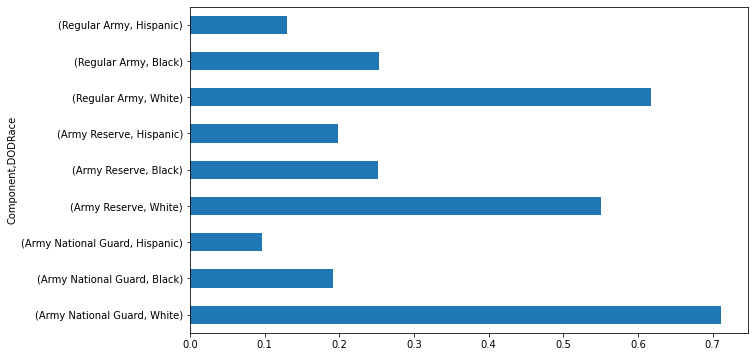

In [32]:
df.groupby("Component")["DODRace"].value_counts(normalize=True).plot(kind="barh")

In [33]:
df.Branch.value_counts(normalize=True)

Combat Service Support   0.524
Combat Arms              0.261
Combat Support           0.215
Name: Branch, dtype: float64

<AxesSubplot:ylabel='Branch,DODRace'>

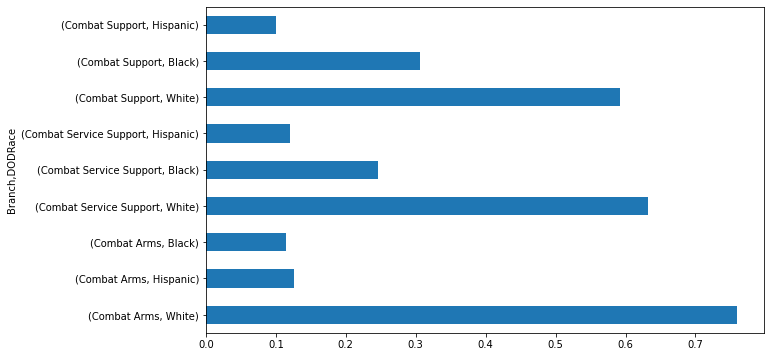

In [34]:
df.groupby("Branch")["DODRace"].value_counts(normalize=True).plot(kind="barh")

<AxesSubplot:ylabel='Branch,Component,DODRace'>

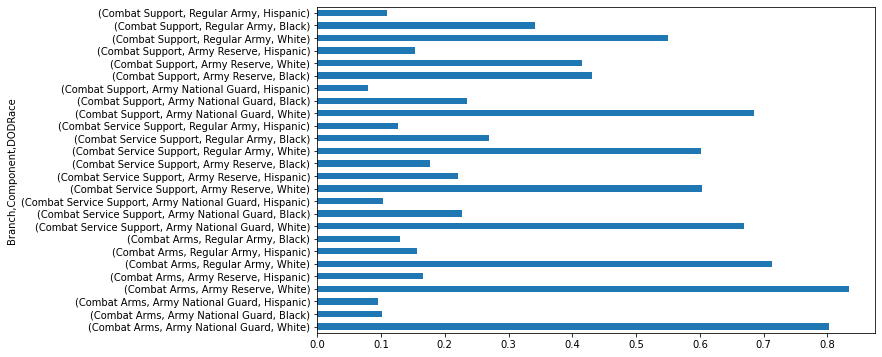

In [35]:
df.groupby(["Branch","Component"])["DODRace"].value_counts(normalize=True).plot(kind="barh")

In [36]:
df.drop(columns="subjectid", inplace=True)

## Explore Data

In [37]:
df.shape

(5769, 102)

In [38]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristheight,Gender,Component,Branch,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,853,Male,Regular Army,Combat Arms,North Dakota,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,815,Male,Regular Army,Combat Support,New York,White,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,831,Male,Regular Army,Combat Support,New York,Black,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,793,Male,Regular Army,Combat Service Support,Wisconsin,White,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,954,Male,Regular Army,Combat Service Support,North Carolina,Black,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,...,836,Female,Army National Guard,Combat Support,Texas,Hispanic,51,67,180,Right hand
6064,262,1324,301,202,1204,236,181,378,294,287,...,804,Female,Army National Guard,Combat Support,Texas,Hispanic,40,63,150,Right hand
6065,260,1334,318,213,1259,234,183,363,332,299,...,774,Female,Army National Guard,Combat Support,Texas,Black,40,66,168,Right hand
6066,205,1293,302,199,1207,213,163,376,276,280,...,769,Female,Army National Guard,Combat Support,Texas,Hispanic,31,63,133,Right hand


In [39]:
df = df.reset_index(drop=True)
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,wristheight,Gender,Component,Branch,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,853,Male,Regular Army,Combat Arms,North Dakota,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,815,Male,Regular Army,Combat Support,New York,White,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,831,Male,Regular Army,Combat Support,New York,Black,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,793,Male,Regular Army,Combat Service Support,Wisconsin,White,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,954,Male,Regular Army,Combat Service Support,North Carolina,Black,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,285,1392,335,223,1297,252,196,368,299,312,...,836,Female,Army National Guard,Combat Support,Texas,Hispanic,51,67,180,Right hand
5765,262,1324,301,202,1204,236,181,378,294,287,...,804,Female,Army National Guard,Combat Support,Texas,Hispanic,40,63,150,Right hand
5766,260,1334,318,213,1259,234,183,363,332,299,...,774,Female,Army National Guard,Combat Support,Texas,Black,40,66,168,Right hand
5767,205,1293,302,199,1207,213,163,376,276,280,...,769,Female,Army National Guard,Combat Support,Texas,Hispanic,31,63,133,Right hand


<AxesSubplot:>

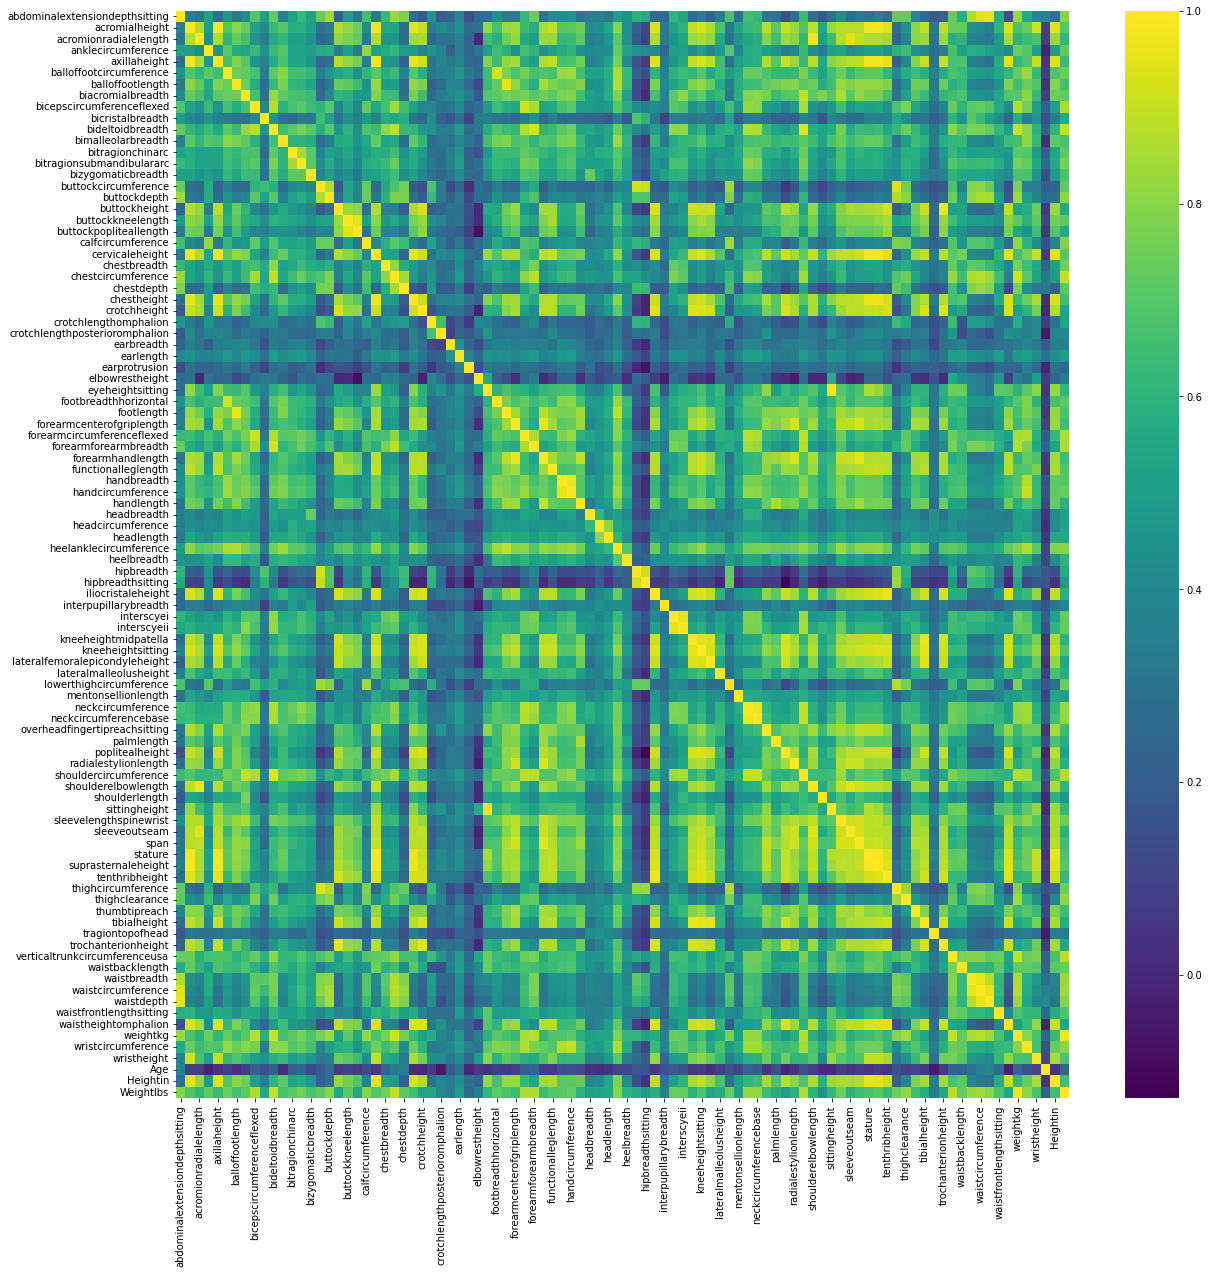

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="viridis")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [42]:
X = df.drop(columns= ["DODRace"])
y = df.DODRace

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [46]:
df.shape, X.shape, y.shape

((5769, 102), (5769, 101), (5769,))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [48]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object')

In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [54]:
from sklearn.pipeline import Pipeline

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

pipe_log_model = Pipeline(steps=operations)

In [55]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[353  24  12]
 [ 14 159  31]
 [ 27 148 963]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90       389
    Hispanic       0.48      0.78      0.59       204
       White       0.96      0.85      0.90      1138

    accuracy                           0.85      1731
   macro avg       0.78      0.84      0.80      1731
weighted avg       0.89      0.85      0.86      1731


Train_Set
[[ 856   27   26]
 [  14  399   62]
 [  61  307 2286]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       909
    Hispanic       0.54      0.84      0.66       475
       White       0.96      0.86      0.91      2654

    accuracy                           0.88      4038
   macro avg       0.81      0.88      0.83      4038
weighted avg       0.90      0.88      0.88      4038



In [56]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [58]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.507
train_precision_Hispanic   0.547
test_recall_Hispanic       0.785
train_recall_Hispanic      0.839
test_f1_Hispanic           0.614
train_f1_Hispanic          0.662
dtype: float64

### Logistic Model GridsearchCV

In [59]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [60]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [61]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [62]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [63]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [64]:
log_model_grid.best_index_

7

In [65]:
pd.DataFrame(log_model_grid.cv_results_).loc[7, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.785
mean_train_score   0.839
Name: 7, dtype: object

In [66]:
log_model_grid.best_score_

0.7852393617021277

In [67]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[353  24  12]
 [ 14 159  31]
 [ 27 148 963]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90       389
    Hispanic       0.48      0.78      0.59       204
       White       0.96      0.85      0.90      1138

    accuracy                           0.85      1731
   macro avg       0.78      0.84      0.80      1731
weighted avg       0.89      0.85      0.86      1731


Train_Set
[[ 856   27   26]
 [  14  399   62]
 [  61  307 2286]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       909
    Hispanic       0.54      0.84      0.66       475
       White       0.96      0.86      0.91      2654

    accuracy                           0.88      4038
   macro avg       0.81      0.88      0.83      4038
weighted avg       0.90      0.88      0.88      4038



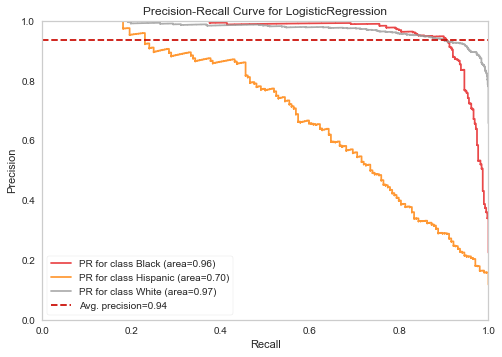

In [69]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

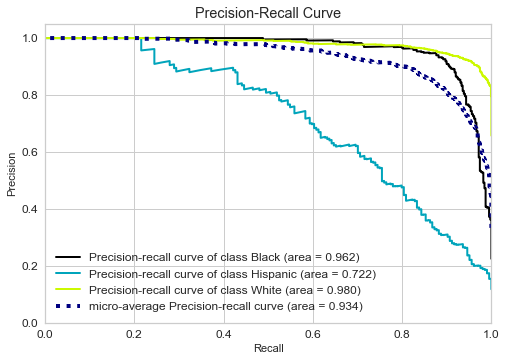

In [70]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [71]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7221735875039341

In [72]:
viz.score_

{'Black': 0.963877192523722,
 'Hispanic': 0.6996424289295785,
 'White': 0.9739224373409712,
 'micro': 0.9360624216510022}

In [73]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [74]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=42))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [75]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[347  22  20]
 [ 14 158  32]
 [ 20 169 949]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       389
    Hispanic       0.45      0.77      0.57       204
       White       0.95      0.83      0.89      1138

    accuracy                           0.84      1731
   macro avg       0.77      0.83      0.79      1731
weighted avg       0.88      0.84      0.85      1731


Train_Set
[[ 839   33   37]
 [  15  399   61]
 [  46  367 2241]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93       909
    Hispanic       0.50      0.84      0.63       475
       White       0.96      0.84      0.90      2654

    accuracy                           0.86      4038
   macro avg       0.80      0.87      0.82      4038
weighted avg       0.90      0.86      0.87      4038



###  SVC Model GridsearchCV

In [76]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [77]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=42))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [78]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [79]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [80]:
svm_model_grid.best_index_

3

In [81]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.751
mean_train_score   0.843
Name: 3, dtype: object

In [82]:
svm_model_grid.best_score_

0.7513297872340426

In [83]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[347  22  20]
 [ 14 158  32]
 [ 20 169 949]]
              precision    recall  f1-score   support

       Black       0.91      0.89      0.90       389
    Hispanic       0.45      0.77      0.57       204
       White       0.95      0.83      0.89      1138

    accuracy                           0.84      1731
   macro avg       0.77      0.83      0.79      1731
weighted avg       0.88      0.84      0.85      1731


Train_Set
[[ 839   33   37]
 [  15  399   61]
 [  46  367 2241]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93       909
    Hispanic       0.50      0.84      0.63       475
       White       0.96      0.84      0.90      2654

    accuracy                           0.86      4038
   macro avg       0.80      0.87      0.82      4038
weighted avg       0.90      0.86      0.87      4038



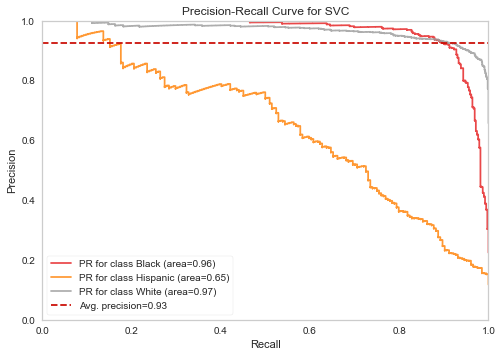

In [85]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=42))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

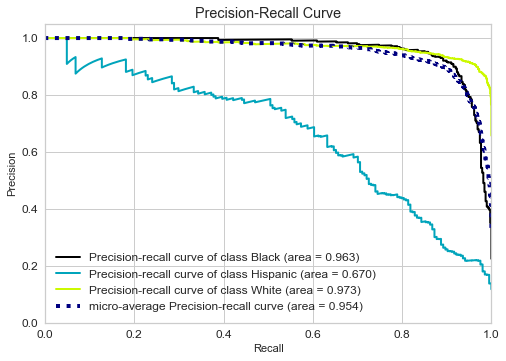

In [86]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=1, class_weight="balanced",random_state=42, probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [87]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [88]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=42))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [90]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[ 279    1  109]
 [  14    6  184]
 [  16    4 1118]]
              precision    recall  f1-score   support

       Black       0.90      0.72      0.80       389
    Hispanic       0.55      0.03      0.06       204
       White       0.79      0.98      0.88      1138

    accuracy                           0.81      1731
   macro avg       0.75      0.58      0.58      1731
weighted avg       0.79      0.81      0.76      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       909
    Hispanic       1.00      1.00      1.00       475
       White       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



In [93]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=42))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.733
train_precision_Hispanic   1.000
test_recall_Hispanic       0.034
train_recall_Hispanic      1.000
test_f1_Hispanic           0.064
train_f1_Hispanic          1.000
dtype: float64

### RF Model GridsearchCV

In [103]:
param_grid = {'RF_model__n_estimators':[300,500],
             'RF_model__max_depth':[2,3,4]}

In [104]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=42))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=2,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [105]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__n_estimators': [300, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [106]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 300}

In [107]:
rf_grid_model.best_index_

0

In [108]:
pd.DataFrame(rf_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.602
mean_train_score   0.650
Name: 0, dtype: object

In [109]:
rf_grid_model.best_score_

0.6021052631578948

In [110]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[264  91  34]
 [ 20 126  58]
 [103 443 592]]
              precision    recall  f1-score   support

       Black       0.68      0.68      0.68       389
    Hispanic       0.19      0.62      0.29       204
       White       0.87      0.52      0.65      1138

    accuracy                           0.57      1731
   macro avg       0.58      0.61      0.54      1731
weighted avg       0.74      0.57      0.61      1731


Train_Set
[[ 621  197   91]
 [  44  307  124]
 [ 238  942 1474]]
              precision    recall  f1-score   support

       Black       0.69      0.68      0.69       909
    Hispanic       0.21      0.65      0.32       475
       White       0.87      0.56      0.68      2654

    accuracy                           0.59      4038
   macro avg       0.59      0.63      0.56      4038
weighted avg       0.75      0.59      0.64      4038



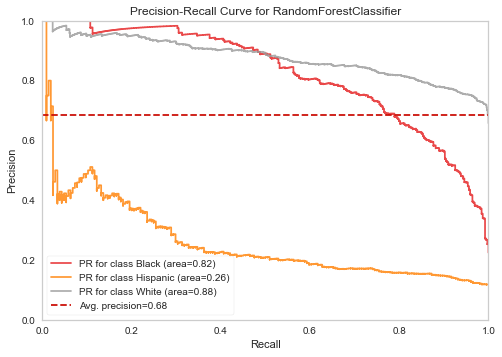

In [111]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=42))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [112]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [113]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

[11:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_byl...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [114]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50715901, 0.50715901, 1.48074807, ..., 0.50715901, 1.48074807,
       0.50715901])

In [118]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index = y_train.index)

comp["label"] = y_train
comp.sample(5)

,weights,label
4033,1.481,Black
5129,1.481,Black
4458,0.507,White
3007,0.507,White
4563,2.834,Hispanic


In [119]:
comp.groupby("label")["weights"].value_counts()

label     weights
Black     1.481       909
Hispanic  2.834       475
White     0.507      2654
Name: weights, dtype: int64

In [120]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

[11:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_byl...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [121]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[ 338    9   42]
 [  16   93   95]
 [  16   26 1096]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       389
    Hispanic       0.73      0.46      0.56       204
       White       0.89      0.96      0.92      1138

    accuracy                           0.88      1731
   macro avg       0.84      0.76      0.79      1731
weighted avg       0.88      0.88      0.87      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       909
    Hispanic       1.00      1.00      1.00       475
       White       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



### XGBoost Model GridsearchCV

In [122]:
param_grid = {"XGB_model__n_estimators":[15, 50, 80],
              'XGB_model__max_depth':[1,2,3],
              "XGB_model__learning_rate": [0.01, 0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [124]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs = -1,
                              return_train_score=True)

In [125]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

[11:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,...
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.01, 0.03, 0.05],
                         'XGB_model__max_depth': [1, 2, 3],
                         'XGB_model__n_estimators': [15, 50, 80],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [126]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 80,
 'XGB_model__subsample': 0.8}

In [127]:
xgb_grid_model.best_index_

100

In [128]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.566
mean_train_score   0.672
Name: 12, dtype: object

In [129]:
xgb_grid_model.best_score_

0.631604609929078

In [130]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[313  46  30]
 [ 23 132  49]
 [ 90 261 787]]
              precision    recall  f1-score   support

       Black       0.73      0.80      0.77       389
    Hispanic       0.30      0.65      0.41       204
       White       0.91      0.69      0.79      1138

    accuracy                           0.71      1731
   macro avg       0.65      0.71      0.65      1731
weighted avg       0.80      0.71      0.74      1731


Train_Set
[[ 768   79   62]
 [  43  330  102]
 [ 193  517 1944]]
              precision    recall  f1-score   support

       Black       0.76      0.84      0.80       909
    Hispanic       0.36      0.69      0.47       475
       White       0.92      0.73      0.82      2654

    accuracy                           0.75      4038
   macro avg       0.68      0.76      0.70      4038
weighted avg       0.82      0.75      0.77      4038



[11:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


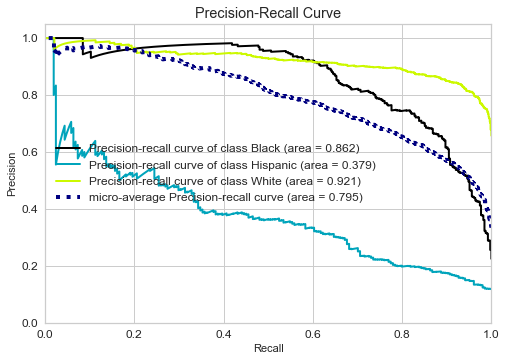

In [131]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=1, learning_rate=0.05, 
                                            max_depth=2, n_estimators=80, objective='multi:softprob', random_state=42,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [132]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.379240745182918

In [133]:
y_test_dummies

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [134]:
y_pred_proba

array([[0.35306728, 0.43844005, 0.20849264],
       [0.41723865, 0.39159167, 0.1911697 ],
       [0.13971055, 0.14036393, 0.7199255 ],
       ...,
       [0.4064543 , 0.39410955, 0.19943619],
       [0.12718037, 0.3215936 , 0.551226  ],
       [0.18628526, 0.50736773, 0.30634704]], dtype=float32)

In [135]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

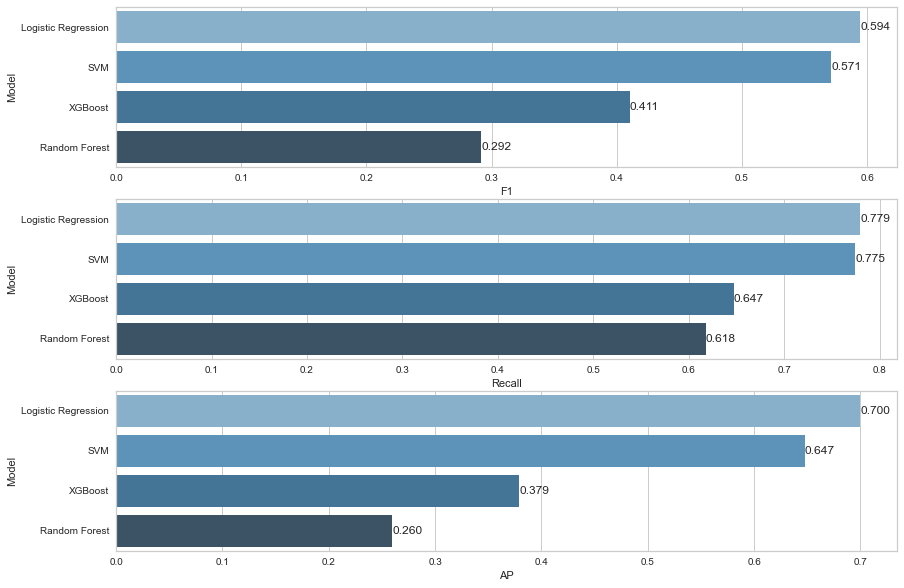

In [137]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [245]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

## Logistic Regression Over/Under Sampling

In [246]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [247]:
X_train_ohe = column_trans.fit_transform(X_train)

In [248]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [249]:
X_over.shape

(7962, 231)

In [250]:
y_over.value_counts()

White       2654
Black       2654
Hispanic    2654
Name: DODRace, dtype: int64

In [251]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [252]:
X_under.shape

(1425, 231)

In [253]:
y_under.value_counts()

Black       475
Hispanic    475
White       475
Name: DODRace, dtype: int64

In [254]:
y_train.value_counts()

White       2654
Black        909
Hispanic     475
Name: DODRace, dtype: int64

In [255]:
over = SMOTE(sampling_strategy={"Hispanic": 900})
under = RandomUnderSampler(sampling_strategy={"White": 2000})

In [256]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [257]:
y_resampled_over.value_counts()

White       2654
Black        909
Hispanic     900
Name: DODRace, dtype: int64

In [258]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [259]:
y_resampled_under.value_counts()

White       2000
Black        909
Hispanic     475
Name: DODRace, dtype: int64

In [260]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [261]:
y_resampled.value_counts()

White       2000
Black        909
Hispanic     900
Name: DODRace, dtype: int64

In [262]:
y_train.value_counts()

White       2654
Black        909
Hispanic     475
Name: DODRace, dtype: int64

## What does the smote pipeline do?

smote_pipeline.fit(X_train, y_train) 

--> column_trans.fit_transform(X_train) #(Onehooencoder and minmaxscaler)

--> over.fit_resample(X_train_transform.y_train) 
                                     
--> under.fit_resample(X_train_transform_over,y_train_over)

--> log_model.fit(X_train_transform_over_under, y_train_over_under)


for predict, over and under sumpling algortims do nothing for X_test.

smote_pipeline.predict(X_test)

--> column_trans.transform(X_test) #(Onehotoencoder and minmaxscaler) 

--> log_model.predict(X_test_transform)

In [263]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000, random_state=42))]

smote_pipeline_log = imbpipeline(steps=operations)

smote_pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 900})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2000})),
                ('log', LogisticRegression(max_iter=10000, random_state=42))])

In [264]:
eval_metric(smote_pipeline_log, X_train, y_train, X_test, y_test)

Test_Set
[[ 353   15   21]
 [  11  139   54]
 [  12   72 1054]]
              precision    recall  f1-score   support

       Black       0.94      0.91      0.92       389
    Hispanic       0.62      0.68      0.65       204
       White       0.93      0.93      0.93      1138

    accuracy                           0.89      1731
   macro avg       0.83      0.84      0.83      1731
weighted avg       0.90      0.89      0.89      1731


Train_Set
[[ 835   22   52]
 [  17  349  109]
 [  30  143 2481]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93       909
    Hispanic       0.68      0.73      0.71       475
       White       0.94      0.93      0.94      2654

    accuracy                           0.91      4038
   macro avg       0.85      0.86      0.86      4038
weighted avg       0.91      0.91      0.91      4038



In [265]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.635
train_precision_Hispanic   0.687
test_recall_Hispanic       0.673
train_recall_Hispanic      0.733
test_f1_Hispanic           0.651
train_f1_Hispanic          0.709
dtype: float64

## SVC Over/Under Sampling

In [266]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("svc", SVC(class_weight="balanced",random_state=42))]

smote_pipeline_svc = imbpipeline(steps=operations)

smote_pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 900})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2000})),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [267]:
eval_metric(smote_pipeline_svc, X_train, y_train, X_test, y_test)

Test_Set
[[347  20  22]
 [ 15 154  35]
 [ 24 166 948]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       389
    Hispanic       0.45      0.75      0.57       204
       White       0.94      0.83      0.88      1138

    accuracy                           0.84      1731
   macro avg       0.77      0.83      0.78      1731
weighted avg       0.88      0.84      0.85      1731


Train_Set
[[ 842   30   37]
 [  16  391   68]
 [  47  351 2256]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       909
    Hispanic       0.51      0.82      0.63       475
       White       0.96      0.85      0.90      2654

    accuracy                           0.86      4038
   macro avg       0.80      0.87      0.82      4038
weighted avg       0.90      0.86      0.87      4038



In [268]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.472
train_precision_Hispanic   0.516
test_recall_Hispanic       0.739
train_recall_Hispanic      0.823
test_f1_Hispanic           0.574
train_f1_Hispanic          0.634
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [271]:
import shap

column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='saga')

In [272]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[354  22  13]
 [ 14 156  34]
 [ 25 143 970]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       389
    Hispanic       0.49      0.76      0.59       204
       White       0.95      0.85      0.90      1138

    accuracy                           0.85      1731
   macro avg       0.78      0.84      0.80      1731
weighted avg       0.89      0.85      0.87      1731


Train_Set
[[ 856   27   26]
 [  14  400   61]
 [  64  300 2290]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       909
    Hispanic       0.55      0.84      0.67       475
       White       0.96      0.86      0.91      2654

    accuracy                           0.88      4038
   macro avg       0.81      0.88      0.83      4038
weighted avg       0.90      0.88      0.89      4038



In [273]:
features = column_trans_shap.get_feature_names_out()
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Component_Army National Guard',
       'onehotencoder__Component_Army Reserve',
       'onehotencoder__Component_Regular Army',
       'onehotencoder__Branch_Combat Arms',
       'onehotencoder__Branch_Combat Service Support',
       'onehotencoder__Branch_Combat Support',
       'onehotencoder__SubjectsBirthLocation_Alabama',
       'onehotencoder__SubjectsBirthLocation_Alaska',
       'onehotencoder__SubjectsBirthLocation_Antigua and Barbuda',
       'onehotencoder__SubjectsBirthLocation_Argentina',
       'onehotencoder__SubjectsBirthLocation_Arizona',
       'onehotencoder__SubjectsBirthLocation_Arkansas',
       'onehotencoder__SubjectsBirthLocation_Bahamas',
       'onehotencoder__SubjectsBirthLocation_Barbados',
       'onehotencoder__SubjectsBirthLocation_Belarus',
       'onehotencoder__SubjectsBirthLocation_Belgium',
       'onehotencoder__SubjectsBirthLocation_Belize',
       'onehote

In [274]:
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]
new_features

['Gender_Female',
 'Gender_Male',
 'Component_Army National Guard',
 'Component_Army Reserve',
 'Component_Regular Army',
 'Branch_Combat Arms',
 'Branch_Combat Service Support',
 'Branch_Combat Support',
 'SubjectsBirthLocation_Alabama',
 'SubjectsBirthLocation_Alaska',
 'SubjectsBirthLocation_Antigua and Barbuda',
 'SubjectsBirthLocation_Argentina',
 'SubjectsBirthLocation_Arizona',
 'SubjectsBirthLocation_Arkansas',
 'SubjectsBirthLocation_Bahamas',
 'SubjectsBirthLocation_Barbados',
 'SubjectsBirthLocation_Belarus',
 'SubjectsBirthLocation_Belgium',
 'SubjectsBirthLocation_Belize',
 'SubjectsBirthLocation_Bermuda',
 'SubjectsBirthLocation_Bolivia',
 'SubjectsBirthLocation_Bosnia and Herzegovina',
 'SubjectsBirthLocation_California',
 'SubjectsBirthLocation_Cameroon',
 'SubjectsBirthLocation_Canada',
 'SubjectsBirthLocation_Cape Verde',
 'SubjectsBirthLocation_Colombia',
 'SubjectsBirthLocation_Colorado',
 'SubjectsBirthLocation_Connecticut',
 'SubjectsBirthLocation_Costa Rica',
 'S

## Shap values for all data

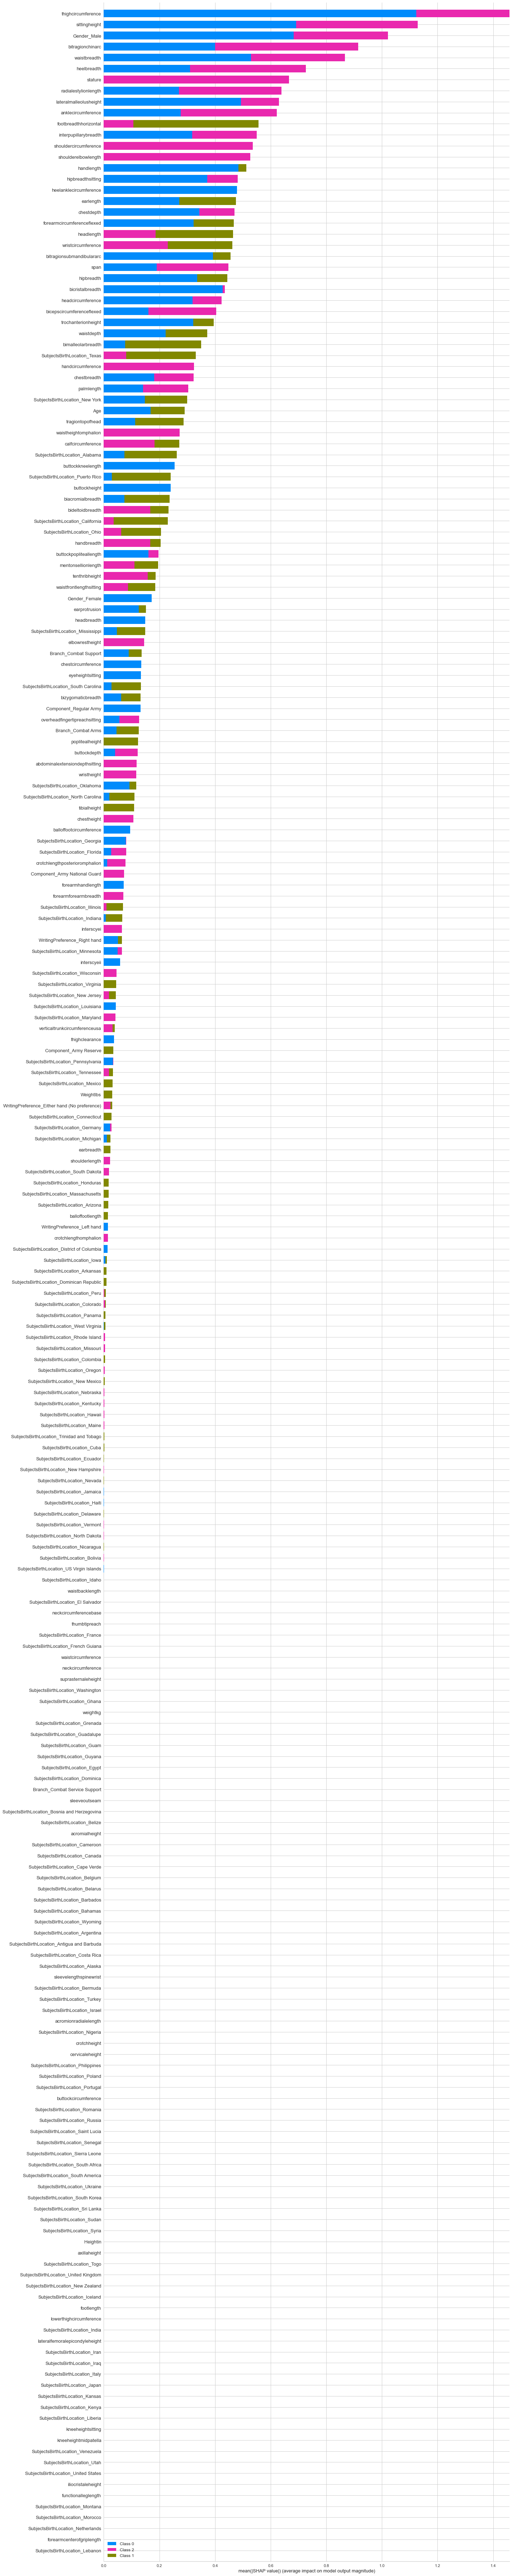

In [275]:
explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = new_features, plot_size=(20,100))

## SHAP for Feature Selection

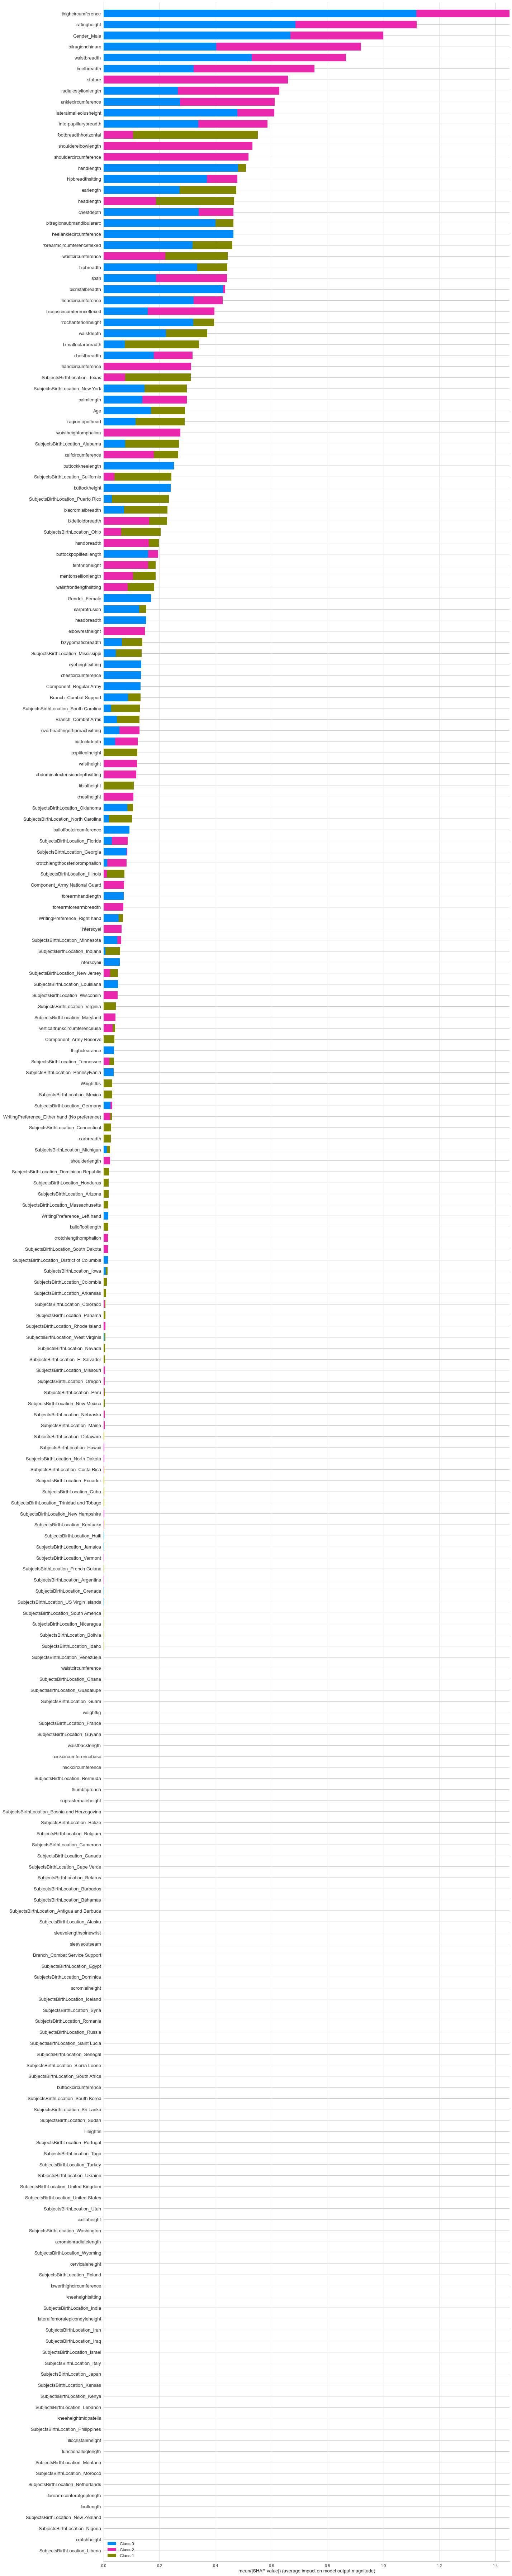

In [276]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = new_features, plot_size=(20,100))

In [284]:
hispanic=["footbreadthhorizontal","handlength","earlength","headlength","bitragionsubmandibulararc","forearmcircumferenceflexed",
         "wristcircumference","hipbreadth","trochanterionheight","waistdepth","bimalleolarbreadth","SubjectsBirthLocation",
         "Age","tragiontopofhead","calfcircumference",
         "biacromialbreadth","bideltoidbreadth","handbreadth","tenthribheight",
         "mentonsellionlength","waistfrontlengthsitting","earprotrusion","bizygomaticbreadth","Branch","poplitealheight","tibialheight",
         "WritingPreference","Component","Weightlbs","earbreadth","balloffootlength"]

In [287]:
X.shape

(5769, 101)

In [288]:
X2 = X[hispanic]
X2.head()

,footbreadthhorizontal,handlength,earlength,headlength,bitragionsubmandibulararc,forearmcircumferenceflexed,wristcircumference,hipbreadth,trochanterionheight,waistdepth,bimalleolarbreadth,SubjectsBirthLocation,Age,tragiontopofhead,calfcircumference,biacromialbreadth,bideltoidbreadth,handbreadth,tenthribheight,mentonsellionlength,waistfrontlengthsitting,earprotrusion,bizygomaticbreadth,Branch,poplitealheight,tibialheight,WritingPreference,Component,Weightlbs,earbreadth,balloffootlength
0,101,193,71,206,291,299,175,332,919,240,71,North Dakota,41,140,373,401,493,90,1092,118,440,19,142,Combat Arms,437,491,Right hand,Regular Army,180,36,202
1,98,195,62,201,320,289,167,312,918,225,67,New York,35,120,357,394,479,86,1076,131,371,18,135,Combat Support,417,476,Left hand,Regular Army,160,33,193
2,103,203,61,202,330,357,180,349,918,255,75,New York,42,125,412,427,544,93,1105,123,411,23,135,Combat Support,431,477,Left hand,Regular Army,205,40,196
3,106,194,66,199,309,318,176,338,847,205,73,Wisconsin,31,127,395,401,518,91,1021,106,399,25,143,Combat Service Support,393,445,Right hand,Regular Army,175,39,199
4,111,218,56,197,310,324,188,332,1090,214,80,North Carolina,21,122,425,435,524,94,1292,135,379,19,138,Combat Service Support,523,584,Right hand,Regular Army,213,32,224


In [289]:
X2.shape

(5769, 31)

In [290]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'Branch', 'WritingPreference', 'Component'], dtype='object')

In [291]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42, stratify =y)

In [292]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=42, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'Branch', 'WritingPreference', 'Component'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [293]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[306  29  54]
 [ 13 150  41]
 [133 173 832]]
              precision    recall  f1-score   support

       Black       0.68      0.79      0.73       389
    Hispanic       0.43      0.74      0.54       204
       White       0.90      0.73      0.81      1138

    accuracy                           0.74      1731
   macro avg       0.67      0.75      0.69      1731
weighted avg       0.79      0.74      0.76      1731


Train_Set
[[ 758   43  108]
 [  26  379   70]
 [ 326  401 1927]]
              precision    recall  f1-score   support

       Black       0.68      0.83      0.75       909
    Hispanic       0.46      0.80      0.58       475
       White       0.92      0.73      0.81      2654

    accuracy                           0.76      4038
   macro avg       0.69      0.79      0.71      4038
weighted avg       0.81      0.76      0.77      4038



In [294]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.441
train_precision_Hispanic   0.462
test_recall_Hispanic       0.752
train_recall_Hispanic      0.803
test_f1_Hispanic           0.554
train_f1_Hispanic          0.587
dtype: float64

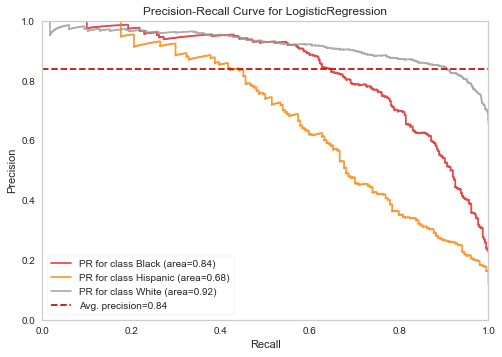

In [295]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

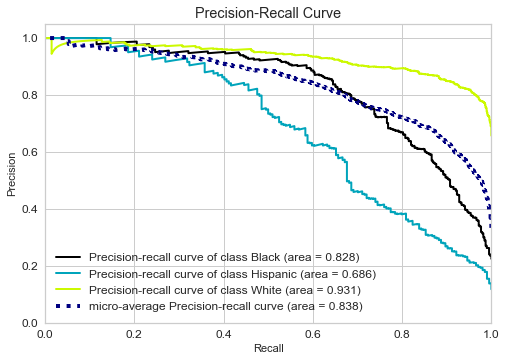

In [296]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [297]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

final_model = Pipeline(steps=operations_final)

In [298]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

## Prediction Example

In [300]:
X[X.Gender=="Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs
count,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000
mean,255.449,1442.946,335.819,229.591,1331.098,252.166,201.230,416.004,358.580,275.632,510.928,74.844,331.656,315.718,142.435,1021.294,246.362,889.500,619.217,504.001,392.427,1519.422,289.787,1060.497,254.390,1293.040,847.638,623.143,356.355,36.095,64.171,23.110,244.824,804.885,101.894,271.574,349.573,310.528,580.702,480.929,1132.126,88.380,212.571,193.509,154.184,574.708,199.761,344.002,72.565,346.257,379.948,1063.413,639.949,431.394,450.629,489.367,555.225,492.626,73.062,409.671,122.685,398.192,435.160,1428.469,116.610,430.685,268.314,1179.903,364.306,149.832,918.679,897.179,594.008,1816.629,1758.385,1440.700,1122.444,626.335,180.739,813.085,469.223,131.117,902.587,1666.783,478.018,327.111,943.043,238.560,388.017,1058.240,858.714,176.169,848.762,30.172,70.122,188.765
std,37.295,62.357,17.281,14.579,58.714,12.894,10.329,19.075,34.512,17.512,32.450,4.097,13.971,16.641,6.142,76.331,26.422,49.412,30.060,26.981,29.698,62.430,18.191,87.117,26.173,56.143,45.923,46.409,29.396,3.012,4.499,2.983,28.714,33.092,5.228,12.928,17.875,21.844,50.830,23.083,55.414,4.350,10.141,9.881,5.454,15.956,6.855,16.409,5.474,24.075,30.120,51.462,34.321,35.081,30.422,27.774,27.522,26.261,5.631,31.848,6.661,25.626,25.429,67.320,6.211,24.525,15.333,63.182,17.980,10.533,35.561,39.686,30.573,83.968,67.658,60.419,52.943,58.346,15.546,43.254,26.170,6.135,48.727,88.905,27.662,34.680,111.463,34.730,29.361,51.599,141.507,8.855,41.139,8.835,2.922,29.782
min,163.000,119

In [302]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting    255.449
acromialheight                   1442.946
acromionradialelength             335.819
anklecircumference                229.591
axillaheight                     1331.098
balloffootcircumference           252.166
balloffootlength                  201.230
biacromialbreadth                 416.004
bicepscircumferenceflexed         358.580
bicristalbreadth                  275.632
bideltoidbreadth                  510.928
bimalleolarbreadth                 74.844
bitragionchinarc                  331.656
bitragionsubmandibulararc         315.718
bizygomaticbreadth                142.435
buttockcircumference             1021.294
buttockdepth                      246.362
buttockheight                     889.500
buttockkneelength                 619.217
buttockpopliteallength            504.001
calfcircumference                 392.427
cervicaleheight                  1519.422
chestbreadth                      289.787
chestcircumference               1

In [303]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [304]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Component,Branch,SubjectsBirthLocation,Age,Heightin,Weightlbs,WritingPreference
mean,255.449,1442.946,335.819,229.591,1331.098,252.166,201.230,416.004,358.580,275.632,510.928,74.844,331.656,315.718,142.435,1021.294,246.362,889.500,619.217,504.001,392.427,1519.422,289.787,1060.497,254.390,1293.040,847.638,623.143,356.355,36.095,64.171,23.110,244.824,804.885,101.894,271.574,349.573,310.528,580.702,480.929,1132.126,88.380,212.571,193.509,154.184,574.708,199.761,344.002,72.565,346.257,379.948,1063.413,639.949,431.394,450.629,489.367,555.225,492.626,73.062,409.671,122.685,398.192,435.160,1428.469,116.610,430.685,268.314,1179.903,364.306,149.832,918.679,897.179,594.008,1816.629,1758.385,1440.700,1122.444,626.335,180.739,813.085,469.223,131.117,902.587,1666.783,478.018,327.111,943.043,238.560,388.017,1058.240,858.714,176.169,848.762,Male,NaN,NaN,California,30.172,70.122,188.765,Right hand


In [305]:
final_model.predict(pd.DataFrame(male_mean_human).T)

array(['Hispanic'], dtype=object)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___